In [1]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import cv2
import numpy as np
import matplotlib.pyplot as plt
import PIL
import io
import html
import time

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%pwd

'/content'

In [4]:
%cd /content/drive/MyDrive/DLCV_workshop/Assessment

/content/drive/MyDrive/DLCV_workshop/Assessment


In [5]:
# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [6]:
def displayImage(image):
    if len(image.shape)==3:
        color_coverted = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.figure(figsize = (20,8))
        plt.imshow(color_coverted)
        plt.show()
        
    else:
        plt.figure(figsize = (20,8))
        plt.imshow(image, cmap="gray")
        plt.show()

(480, 640, 3)
Point 1 = ( 239 , 151 )
Point 2 = ( 431 , 343 )


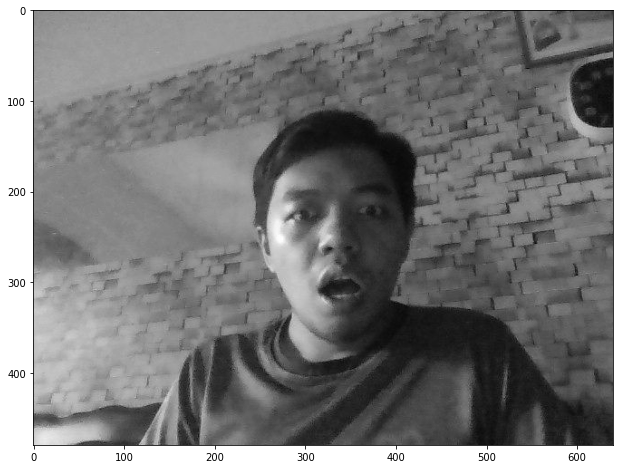

In [34]:
img = cv2.imread("photo1.jpg", cv2.IMREAD_COLOR)
imgGray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
print(img.shape)

# get face bounding box coordinates using Haar Cascade
faces = face_cascade.detectMultiScale(imgGray)

# draw face bounding box on image
for (x,y,w,h) in faces:
      #img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
      x1 = x
      y1 = y
      x2 = x+w
      y2 = y+h
      #print("Point 1 = (", x1, ",", y1, ")")
      #print("Point 2 = (", x2, ",", y2, ")")

print("Point 1 = (", x1, ",", y1, ")")
print("Point 2 = (", x2, ",", y2, ")")
displayImage(imgGray)

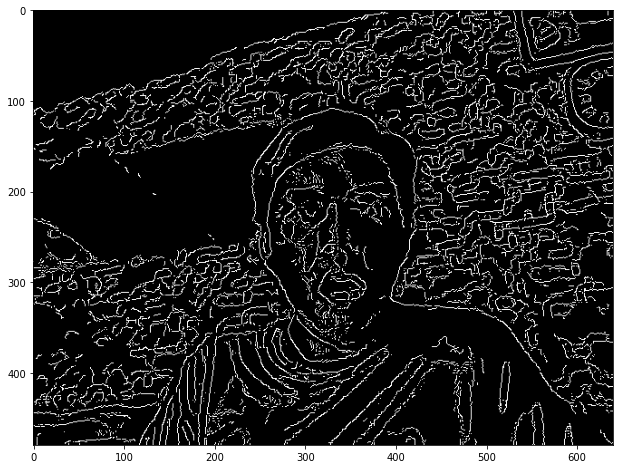

(480, 640)


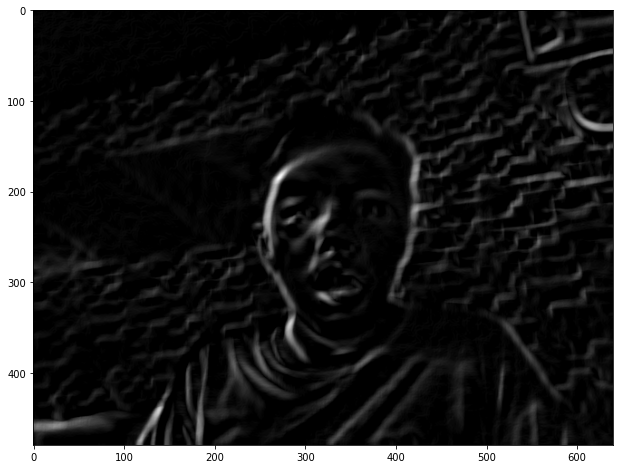

(480, 640)


In [35]:
imgBlur = cv2.GaussianBlur(imgGray,(9,9),5)

imgCanny = cv2.Canny(imgBlur,2,20)
displayImage(imgCanny)
print(imgCanny.shape)

sobelx = cv2.Sobel(imgBlur, cv2.CV_8U,1,0,ksize=3)
sobely = cv2.Sobel(imgBlur, cv2.CV_8U,0,1,ksize=3)
imgSobel = sobelx + sobely
displayImage(imgSobel)
print(imgSobel.shape)

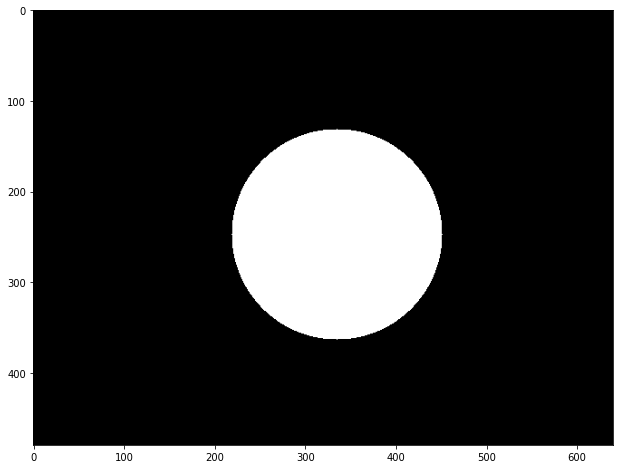

(480, 640)

In [36]:
mask = np.zeros((imgGray.shape), dtype=np.uint8)
px = int(x1+((x2-x1)/2))
py = int(y1+((y2-y1)/2))
rad = int((y2-y1)/2)+20
mask = cv2.circle(mask,(px,py),rad,(255,255,255),-1)
displayImage(mask)
mask.shape

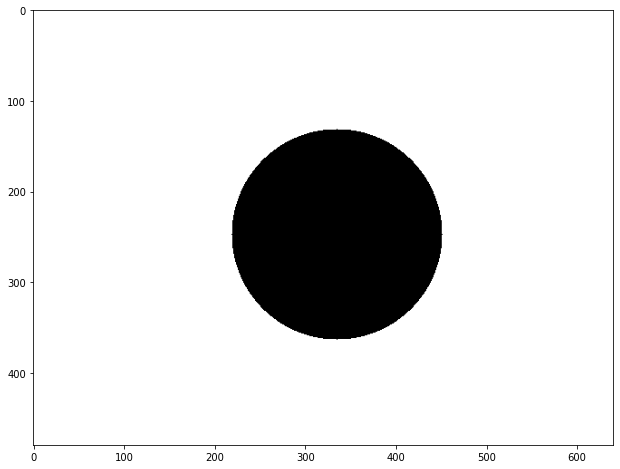

(480, 640)

In [37]:
mask2 = np.ones((imgGray.shape), dtype=np.uint8)
px = int(x1+((x2-x1)/2))
py = int(y1+((y2-y1)/2))
rad = int((y2-y1)/2)+20
mask2 = cv2.circle(mask2,(px,py),rad,(0,0,0),-1)
displayImage(mask2)
mask2.shape

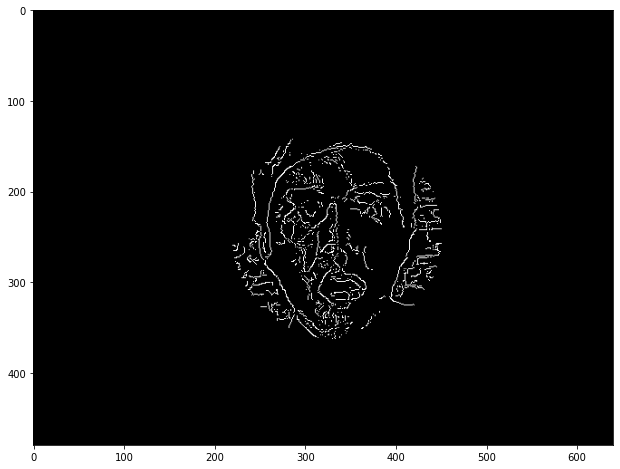

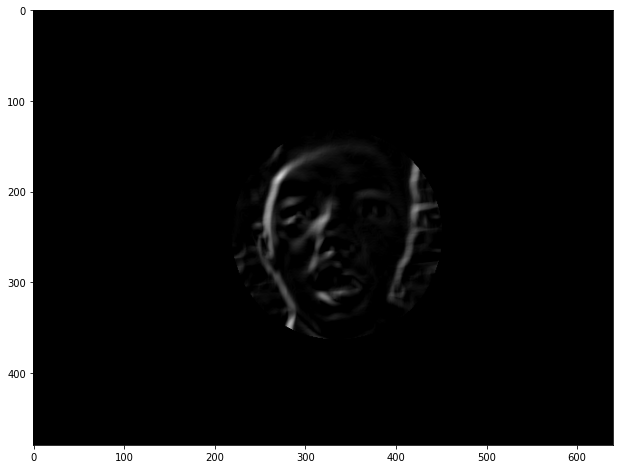

(480, 640, 3)

In [38]:
imgBitwiseCanny = cv2.bitwise_and(imgCanny, imgCanny, mask=mask)
imgBitwiseCanny = cv2.cvtColor(imgBitwiseCanny, cv2.COLOR_GRAY2BGR)
displayImage(imgBitwiseCanny)
imgBitwiseCanny.shape

imgBitwiseSobel = cv2.bitwise_and(imgSobel, imgSobel, mask=mask)
imgBitwiseSobel = cv2.cvtColor(imgBitwiseSobel, cv2.COLOR_GRAY2BGR)
displayImage(imgBitwiseSobel)
imgBitwiseSobel.shape

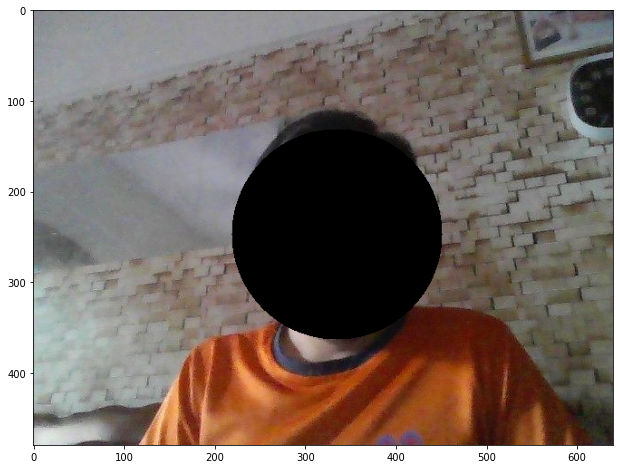

In [39]:
imgForeground = cv2.bitwise_and(img, img, mask=mask2)
displayImage(imgForeground)

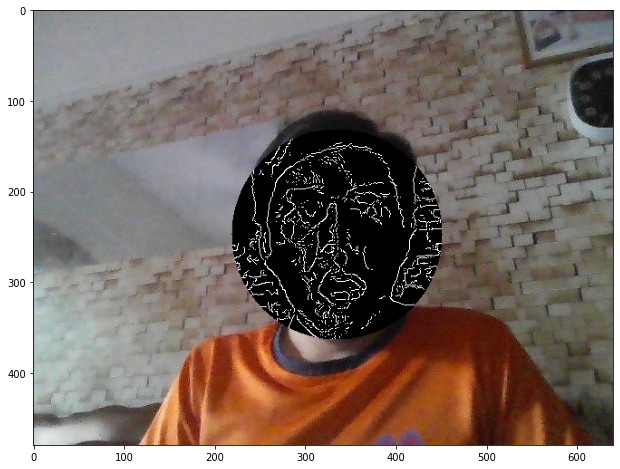

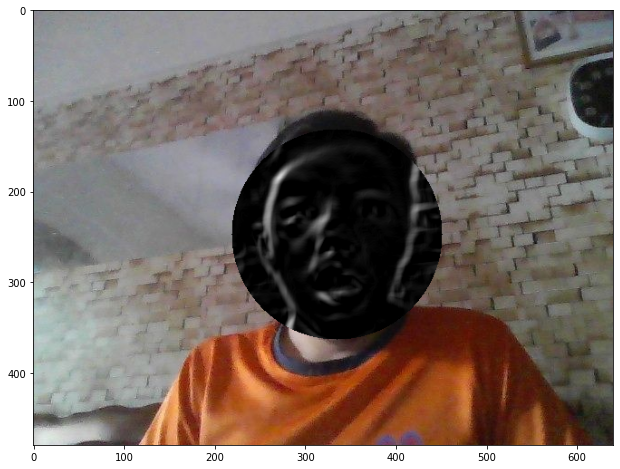

True

In [40]:
# Add the two previous results obtain the final result
resultCanny = cv2.add(imgBitwiseCanny,imgForeground)
displayImage(resultCanny)
#cv2.imwrite("photo1canny.jpg", resultCanny)

resultSobel = cv2.add(imgBitwiseSobel,imgForeground)
displayImage(resultSobel)
#cv2.imwrite("photo1sobel.jpg", resultSobel)